<a href="https://colab.research.google.com/github/akshaykokane/Simple-Spell-Checker-Using-Python/blob/main/SpellCorrections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd    
import numpy as np
import nltk   
nltk.download('punkt')

words = ["1/4\" BLUE","10 IN","12 INCH","12 V","12 VOLT","12 VOLTS","AIRCRAF","AIRCRAF.","AIRCRAFI","AIRCRAFT","ANNUL","ANNULA","ANNULAR","ASSEM","ASSEMBL","ASSEMBLED","ASSEMBLED ","ASSEMBLY","ASSENBLE","ENGENE","ENGINE","FORD MOTOR","MODEL T","NYLON","PRODU","PRODUCTS","RED","ROUND","SILVAR","SILVER","TRANSFORM.","TRANSFORMAR","TRANSFORMER","TURBO ENGINE","WIND0W","WINDOW","WINDSCR","WINDSCREE","WINDSCREEN","YELLO","YELLOW"]

df=pd.DataFrame(words, columns=['word'])

df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['word']), axis=1)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,word,tokens
0,"1/4"" BLUE","[1/4, '', BLUE]"
1,10 IN,"[10, IN]"
2,12 INCH,"[12, INCH]"
3,12 V,"[12, V]"
4,12 VOLT,"[12, VOLT]"


In [148]:
from spellchecker import SpellChecker
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer
spell = SpellChecker()

In [149]:
corrected_spelling_col = []
incorrect_spellings= 0
total_spellings = 0
for (index, row) in df.iterrows():
   corrected_spelling = [] 
   for token in row['tokens']:
       total_spellings = total_spellings + 1
       if len(token) > 1 and token.isnumeric() == False and any(c.isalpha() for c in token) == True:
          corrected_spelling.append(spell.correction(token).upper())
          incorrect_spellings = incorrect_spellings + 1
       else:
          corrected_spelling.append(token)
   corrected_spelling_col.append(TreebankWordDetokenizer().detokenize(corrected_spelling))

df['corrected_spelling_col'] = corrected_spelling_col
df.head()

,word,tokens,corrected_spelling_col
0,"1/4"" BLUE","[1/4, '', BLUE]","1/4""BLUE"
1,10 IN,"[10, IN]",10 IN
2,12 INCH,"[12, INCH]",12 INCH
3,12 V,"[12, V]",12 V
4,12 VOLT,"[12, VOLT]",12 VOLT


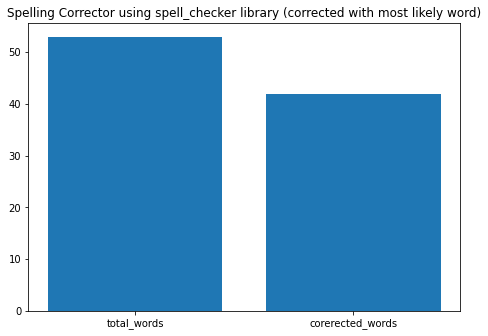

In [150]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Spelling Corrector using spell_checker library (corrected with most likely word)')
xaxis = ['total_words', 'corerected_words']
yaxis = [total_spellings, incorrect_spellings]
ax.bar(xaxis,yaxis)
plt.show()

In [151]:
df = df.drop(['tokens'], axis=1)

In [152]:
df = df.rename(columns={"word": "Orginal String", "corrected_spelling_col": "Corrected String"})
df

,Orginal String,Corrected String
0,"1/4"" BLUE","1/4""BLUE"
1,10 IN,10 IN
2,12 INCH,12 INCH
3,12 V,12 V
4,12 VOLT,12 VOLT
5,12 VOLTS,12 VOLTS
6,AIRCRAF,AIRCRAFT
7,AIRCRAF.,AIRCRAFT.
8,AIRCRAFI,AIRCRAFT
9,AIRCRAFT,AIRCRAFT
